### Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import dlib
import cv2
import math
from google.colab.patches import cv2_imshow

### Calculate Eye Aspect Ratio(EAR)

EAR value should be calculated properly, the following isn't doing the right job.

In [4]:
def distance(p1, p2):
  return math.sqrt((p1.x - p2.x)**2 + (p1.y - p2.y)**2)

In [5]:
# Function to calculate Eye Aspect Ratio (EAR) based on facial landmarks
def calculate_ear_from_landmarks(landmarks):
    # Extracting coordinates of the eyes, this coordinates need to be fine tuned for EAR calculations
    left_eye = [landmarks.part(i) for i in range(36, 42)]  # Indices 36 to 41 correspond to the left eye
    right_eye = [landmarks.part(i) for i in range(42, 48)]  # Indices 42 to 47 correspond to the right eye
    print(distance(left_eye[0],left_eye[3]))
    # Calculating EAR
    left_ear = (distance(left_eye[1],left_eye[5]) + distance(left_eye[2], left_eye[4])) / (2.0 * distance(left_eye[0],left_eye[3]))
    right_ear = (distance(right_eye[1], right_eye[5]) + distance(right_eye[2], right_eye[4])) / (2.0 * distance(right_eye[0], right_eye[3]))
    # Overall EAR is the average of left and right EAR
    ear = (left_ear + right_ear) / 2.0
    return ear

## Reading the image

In [34]:
def detect_landmarks(image):
  detector = dlib.get_frontal_face_detector()
  predictor = dlib.shape_predictor("/content/drive/MyDrive/Facial Landmarks/shape_predictor_68_face_landmarks.dat")  # Replace with the actual path
  faces = detector(image)
  try:
    landmarks = predictor(image, faces[0])
    return landmarks
  except:
    print("No faces Detected!")
    return None
path = input("Input image path: ")
image = dlib.load_rgb_image(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (0, 0), fx = 0.3, fy = 0.3)
landmarks = detect_landmarks(image)
if landmarks:
  ear_value = calculate_ear_from_landmarks(landmarks)
  print("Eye Aspect Ratio:", ear_value)

Input image path: /content/drive/MyDrive/Facial Landmarks/Drive-_-chronique-e1606150466516.webp
9.0
Eye Aspect Ratio: 0.31666666666666665


## Detecting the landmarks

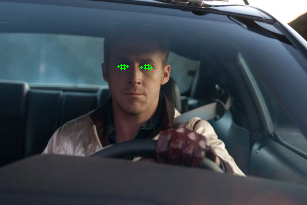

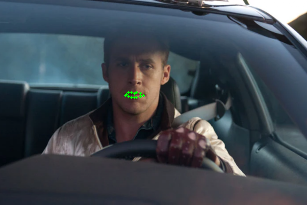

In [41]:
# Draw landmarks with green color
threshold = 0.25
if ear_value>threshold:
  color = (0,255,0)
else:
  color = (0,0,255)

def eye_land_marks(image,color):
  for i in range(36,48):
      x, y = landmarks.part(i).x, landmarks.part(i).y
      cv2.circle(image, (x, y), 1, color, -1)  # Green color
  return image

def mouth_land_marks(image):
  for i in range(48,61):
      x, y = landmarks.part(i).x, landmarks.part(i).y
      cv2.circle(image, (x, y), 1, (0,255,0), -1)  # Green color
  return image

# Display the image with landmarks
cv2_imshow(eye_land_marks(image.copy(),color = color))
cv2_imshow(mouth_land_marks(image.copy()))

## Eye Regions - Bounding Box and Cropping

### To Crop
___
x coordinate of 42: x coordinate of 26 --> width
y coordinate of 26: y coordinate of 47 --> height

```
image[landmarks.part(42).x:landmarks.part(26).x, landmarks.part(26).y:landmarks.part(47).y]
```

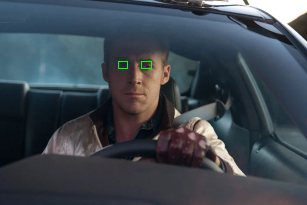

In [42]:
def eye_bounding_boxes(image, color=(255,255,255), thickness=1, crop=False):
  #idealeye bounding box coordinates
  coordinates = {
      "right_start":(landmarks.part(45).x,landmarks.part(26).y),
      "right_end": (landmarks.part(42).x, landmarks.part(47).y),
      "left_start": (landmarks.part(45-6).x,landmarks.part(26).y),
      "left_end": (landmarks.part(42-6).x, landmarks.part(47).y)
  }

  box = cv2.rectangle(image.copy(), coordinates["right_start"], coordinates["right_end"], color, thickness)
  box = cv2.rectangle(box, coordinates["left_start"], coordinates["left_end"], color, thickness)
  # crop code
  if crop:
    crop_right = image[coordinates["right_start"][1]: coordinates["right_end"][1], coordinates["right_end"][0]:coordinates["right_start"][0]]
    crop_left = image[coordinates["left_start"][1]: coordinates["left_end"][1], coordinates["left_end"][0]:coordinates["left_start"][0]]
    return box, crop_left,crop_right
  return box

eye_detected, left, right = eye_bounding_boxes(image.copy(), color = color, crop=True)
cv2_imshow(eye_detected)

In [43]:
cv2_imshow(left)
cv2_imshow(right)